In [1]:
import matplotlib.pyplot as plt

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

En esta sesión veremos algunas operaciones y algoritmos que se pueden hacer en un árbol binario de búsqueda (BST por sus siglas en inglés), por ejemplo buscar e insertar elementos, así como construir un BST a partir de una lista de números dada.

Para trabajar con un BST, lo primero que debemos hacer es definir la estructura de nuestros nodos en el árbol, donde cada nodo tiene un valor asignado, y dos apuntadores, uno para su hijo izquierdo y otro para su hijo derecho.

In [2]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"

In [3]:
n = Node(4)
n.left = Node(3)
n.right = Node(5)
print(n)

Valor: 4
Izquierda: 3
Derecha: 5


# Inserción y búsqueda

Veamos las primeras dos operaciones básicas en un BST: buscar elementos, e insertar elementos. Para insertar elementos en un BST, procedemos de una forma muy similar a como se hace una búsqueda binaria: si queremos insertar el valor `x` y estamos en el nodo `n`, comparamos `n.value` con `x`, para lo cual existen tres casos posibles:

* `x < n.value`: Nos desplazamos hacia el hijo de la izquierda. Si este no existe, lo volvemos `x`.
* `x > n.value`: Nos desplazamos hacia el hijo de la derecha. Si este no existe, lo volvemos `x`.
* `x = n.value`: No hacemos nada, ya que no puede haber elementos duplicados en el BST.

In [4]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"
       
    
    def insert(self, x):
        if self.val == x:
            return

        elif x < self.val:
            if self.left is not None:
                self.left.insert(x)
            else:
                self.left = Node(x)
        else:
            if self.right is not None:
                self.right.insert(x)
            else:
                self.right = Node(x)

In [5]:
root = Node(0)
root.insert(1)
root.insert(-2)
root.insert(2)
root

Valor: 0
Izquierda: -2
Derecha: 1

Para buscar un elemento, el procedimiento es prácticamente el mismo que en la inserción:

* `x < n.value`: Nos desplazamos hacia el hijo de la izquierda. Si este no existe, significa que `x` no está en el árbol.
* `x < n.value`: Nos desplazamos hacia el hijo de la derecha. Si este no existe, significa que `x` no está en el árbol.
* `x = n.value`: `n` es el nodo que buscamos, así que lo regresamos.

In [201]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
        
    def __repr__(self):
        left = None if self.left is None else self.left.val
        right = None if self.right is None else self.right.val
        return f"Valor: {self.val}\nIzquierda: {left}\nDerecha: {right}"
       
    
    def insert(self, x):
        if x == self.val:
            return
        elif x < self.val:
            if self.left is not None:
                self.left.insert(x)
            else:
                self.left = Node(x)
        elif x > self.val:
            if self.right is not None:
                self.right.insert(x)
            else:
                self.right = Node(x)
                
                
    def search(self, x):
        if self.val == x:
            return self
        elif x < self.val:
            if self.left is None:
                return
            else:
                return self.left.search(x)
        elif x > self.val:
            if self.right is None:
                return
            else:
                return self.right.search(x)

In [7]:
root = Node(0)
root.insert(1)
root.insert(-2)
root.insert(2)

root.search(3)

# Recorridos

Veremos ahora dos de las formas más comunes de recorrer un BST: in-order y pre-order traversal. Usaremos el siguiente árbol:

```
          4
        /    \
       2      6
      / \    / \
     1   3  5   7
    /            \
   0              8
```   

In [23]:
tree = Node(4)
tree.insert(2)
tree.insert(1)
tree.insert(0)
tree.insert(3)
tree.insert(6)
tree.insert(5)
tree.insert(7)
tree.insert(8)


## In-order

In-order traversal nos permite rescatar la lista de números de manera ordenada, visita primero todo lo que hay a la izquierda de la raíz, después la raíz y posteriormente el hijo derecho, haciendo esto de manera recursiva. Esto nos será muy útil para después poder eliminar elementos en un árbol binario de búsqueda. Veamos un ejemplo de un in-order traversal en un árbol de este tipo.

In [24]:
def in_order(root):
    if root is not None:
        in_order(root.left)
        print(root.val) # aquí es donde visitamos
        in_order(root.right)
    else:
        return

in_order(tree)

0
1
2
3
4
5
6
7
8


Notemos que con este tipo de ideas podemos encontrar el mínimo valor y el máximo valor en un árbol binario de búsqueda.

## Pre-order

Consiste en visitar el nodo actual, después lo que hay en su hijo izquierdo y después en su hijo derecho. Podemos notar que es un recorrido particular de un recorrido de DFS en un árbol.

In [25]:
def pre_order(root):
    if root is not None:
        print(root.val)
        pre_order(root.left)
        pre_order(root.right)
    else:
        return

pre_order(tree)

4
2
1
0
3
6
5
7
8


## Post-order

Consiste en visitar el subárbol izquierdo, luego el derecho, y finalmente el nodo actual. 

In [26]:
def post_order(root):
    if root is not None:
        pre_order(root.left)
        pre_order(root.right)
        print(root.val)
    else:
        return

post_order(tree)

2
1
0
3
6
5
7
8
4


# Graficado

Nótese que podemos utilizar cualquiera de las caminatas anteriores para construir una gráfica de `networkx` a partir de nuestro árbol: cada vez que visitamos un nodo, lo añadimos a él y a sus hijos a la gráfica, junto con las aristas que los unen:

In [27]:
def build_graph(root, g=None):
    if g is None:
        g = nx.Graph()
    
    if root is not None:
        build_graph(root.left, g)
        g.add_node(root.val)
        if root.left is not None:
            g.add_edge(root.val, root.left.val)
        if root.right is not None:
            g.add_edge(root.val, root.right.val)
        build_graph(root.right, g)
    return g

Para asegurarnos que al momento de graficar se vea como un árbol, usamos el layout `dot` de `graphviz`:

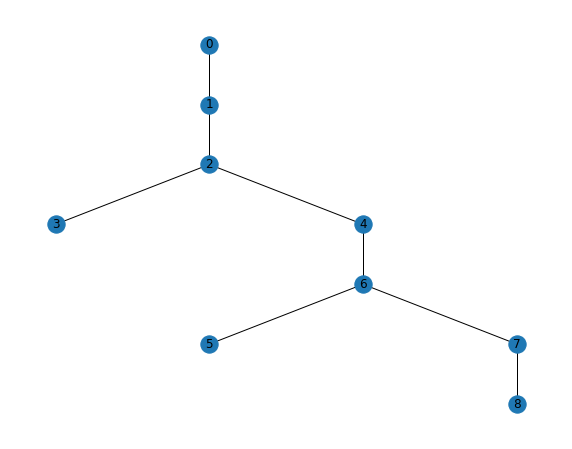

In [28]:
g = build_graph(tree)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos)

# Borrado

Veamos ahora cómo eliminar un nodo $N$ de un BST. Notemos que hay tres casos posibles:


*   Si $N$ no tiene hijos, es suficiente con eliminar dicho nodo.
*   Si $N$ tiene únicamente un hijo, reemplazamos el nodo $N$ por su hijo.
*   Si $N$ tiene dos hijos, tenemos que reacomodar de una manera más sofisticada los nodos para que siga siendo un BST. Esto podemos hacerlo con el siguiente algoritmo:

    1. Encontramos el siguiente nodo con un valor mayor a $N$, i.e., su sucesor en in-order traversal; llámese $S$. Nótese que este nodo es el que tiene menor valor del subárbol derecho.  
    2. Reemplazamos el valor de $N$ con el de $S$.
    3. Borramos $S$, esto último se puede hacer sin problemas pues el sucesor de un nodo con dos hijos es necesariamente una hoja, ya que es el valor mínimo en el subárbol con raíz en su hijo derecho.

Para hacer esto, necesitaremos una función que nos permita encontrar el valor mínimo en un sub árbol a partir de cierto nodo. 

In [14]:
def min_value(root):
    if root is not None:
        while root.left is not None:
            root = root.left
        return root
    else:
        return None

Ahora, implementamos el algoritmo de borrado de modo que si pedimos eliminar un valor que no existe, el BST no se vea modificado y no haya problemas.

In [17]:
def delete(root, x):
    if root is not None:
        if root.val == x:
            if root.left is None: # Tiene a lo más un hijo, el derecho
                new = root.right
                root = None # Vaciamos el nodo root
                return new
            elif root.right is None: # Tiene sólo el hijo izquierdo
                new = root.left
                root = None
                return new
            else: # Tiene ambos hijos
                new = min_value(root.right)
                root.val = new.val
                root.right = delete(root.right, new.val)
                return root
        else: 
            if root.val < x:
                root.right = delete(root.right, x)
            else:
                root.left = delete(root.left, x)
            return root
    else:
        return None


# rd = Node(L[0])
# for l in L[1:]:
#     rd.insert(l)

delete(tree, 4)
#in_order(rd)

Valor: 5
Izquierda: 2
Derecha: 6

# Reconstrucción

Veamos un último ejemplo. Supongamos que se tiene una lista no vacía de enteros distintos $L$, tal que $L$ es el pre-order de un árbol binario de búsqueda, nuestro objetivo es reconstruir dicho BST.

Una primer idea para atacar este problema sería hacer lo que ya hicimos previamente, ir agregando elemento por elemento usando nuestra función de insertar, sin ambargo, hacer esto nos puede tomar $O(n^2)$ en tiempo (si nuestro árbol resulta ser un camino). 

Optimizaremos nuestro algoritmo usando una pila. Comenzamos con una pila $P$ a la que agregamos el primer valor de la lista $L$, el cual también lo haremos la raíz de nuestro BST. Posteriormente vamos a iterar sobre los elementos de $L$, y tenemos dos casos:

*   Si el elemento actual es menor que el elemento en la cima de la pila, hacemos que este elemento sea hijo izquierdo de la cima, y agregamos el nodo a la pila.
*   Si el elemento actual es mayor que el elemento en la cima de la pila, removemos dicha cima de la pila, y continuamos removiendo elementos hasta llegar a que la pila sea vacía o que el elemento en la cima sea mayor que el actual, y hacemos que el elemento actual sea el hijo derecho del último elemento que se removió de la pila. Posteriormente agregamos el nodo con valor el elemento actual a la pila.

Veamos una implementación de este algoritmo.



In [18]:
from collections import deque

def construct_BST(L):
    root = node(L[0])
    queue = deque()
    queue.append(root)
    for i in range (1, len(L)):
        if L[i] < queue[-1].value:
            curr = node(L[i])
            queue[-1].left = curr
            queue.append(curr)
        else:
            curr = node(L[i])
            last = queue[-1]
            while queue:
                if(L[i] < queue[-1].value):
                    break
                else:
                    last = queue[-1]
                    queue.pop()
            last.right = curr
            queue.append(curr)
    return root

BST_from_L = construct_BST([2, 1, 7, 4, 3, 6, 5, 8])
in_order(BST_from_L)
print('------------')
pre_order(BST_from_L)

NameError: ignored

# Ejercicios

## Ejercicio 1
Escribe una función para determinar si un árbol dado es un BST o no. Da ejemplos para ambos casos.

Para que un árbol sea un BTS, primero debe ser *per se* un arbol binario, y además, como lo visto en clase sabemos que para que sea un BST, debe de cumplir que los sub arboles izquierdos de un nodo, deben de ser de un 'valor' menor.  Usemos estas dos caracteristicas para determinar si un arbol arbitrario es BST.

1. Vamos a asumir que la función recibe un árbol.

2. Vamos a verificar que los sub arboles izquierdos sean menores que sus nodos a la derecha, y a su vez debemos que verificar que todos los sub árboles derechos sean en efecto mayores que los nodos a su izquierda.

3. Notemos que no basta con ir verificanndo los sub árboles solo directamente con sus nodos anteriores, pues puede darse un caso donde un nodo a la derecha sea en efecto mayor que su nodo antecedente, pero puede ser mayor que el propio nodo raíz, por lo que dejaría de ser un árbol binario de búsqueda.

Sabemos que cada nodo, tiene un nodo a la izquierda o derecha, que sea un arbol binario de busqueda depende de estas características, como vimos en clase, cada árbol se definia mediante la clase `Node` el cual asignaba dichas caracteriticas. Podemos utilizar dichas caracteristicas para determinar si un arbol dado de la clase `Node` es en efecto un BST.

Entonces, vamos a crear una función que reciba un árbol de la clase `Node`, pero además, vamos a utilizar dos parámetros, `max`y `min` que serviran como parámetros de control para las comparaciones.

Notemos que puede darse el caso, donde no todos los nodos, tengan un nodo izquierdo o derecho, en esos casos, no es posible realizar la comparación, asi que necesitamos, verificar que en efecto siga siendo un nodo de clase `Node`.

Luego podemos hacer las comparaciones, en una primera iteración vamos a necesitar ierar sobre el nodo raíz, y compararlo con os parametros de control, pero estos parametros se irán modifcando con cada iteración.

Por sus caracteristicas, si es un BST, debe de cumplir que 
 
 - `nodo_izquierdo < nodo`, donde `nodo_izquierdo` es el nodo a la izquerda del nodo padre de ese sub árbol.
 - `nodo_derecha > nodo`.

Sin embargo, estas comparaciones si se hacen simultaneamente pueden dejar casos en los que esas comparaciones se cumplen, pero el árbol no es un BST. Aquí entran los parámetros de control.

Si en lugar de comparar al mismo tiempo los nodos izquierdos, y derecho, se comparan en iteraciones separadas, y entonces ahora tenemos que comprobar que:

- `nodo_izquierda < nodo`
- `nodo_izquierda < nodoant`, donde `nodoant` es el nodo anterior al nodo del que se desprende el `nodo_izquierda`.

Y de forma análoga para los nodos que se disribuyan poor la derecha. Entonces, vamos a hacer durante los primeros niveles del arbo una compracion con los parámetros de conrol, y recursivamente vamos a llamar a la función sustituyendo esos valores, hasta que se compare con los nodos antesesores:



In [293]:
def is_BST(tree, a, b):
  # Verificación que si tenga el aributo de valor, si se llega al final y no retorno Falso.
  # entonces es un BST
  if tree == None:
    return True
  # Comparaciones
  if tree.val < a:
    return False
  if tree.val > b:
    return False

  # Inicia recursividad, los valores por la izquierda se comparan si tree.left < tree.val
  # Si se va por la derecha se compara si tree.right > tree.val
  # En la segunda recurción, es decir en el segundo nivel del arbol, cuando ya haya al menos dos antecedentes
  # se comparará con esos támbien.
  return isBST(tree.right, tree.val, b) and isBST(tree.left, a, tree.val) 

**Ejemplos**

In [294]:
a = -10000
b = 10000

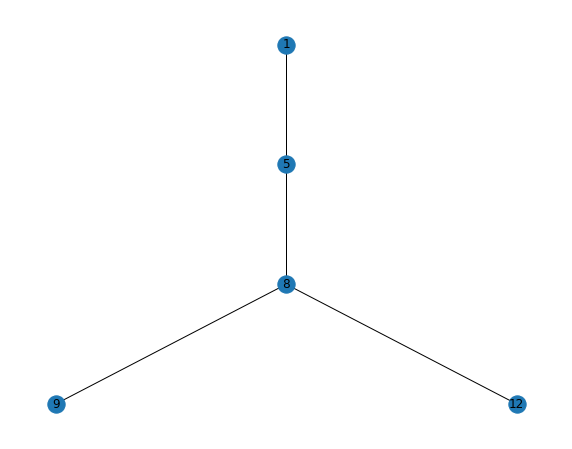

In [295]:
root1 = Node(5)
root1.left = Node(1) 
root1.right = Node(8) 
root1.right.left = Node(9)
root1.right.right = Node(12)

g = build_graph(root1)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos)

In [296]:
is_BST(root1, a, b)

False

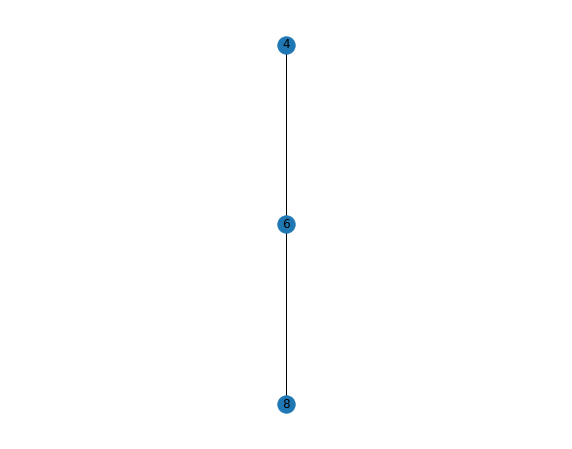

In [298]:
root2 = Node(8)
root2.left = Node(6) 
root2.left.left = Node(4)

g = build_graph(root2)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos)

In [297]:
is_BST(root2, a, b)

True

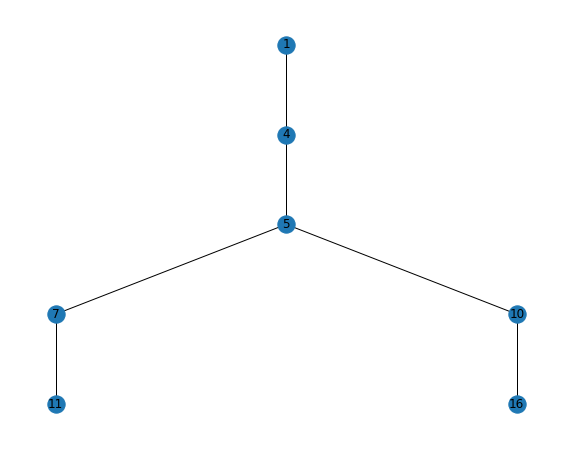

In [300]:
root3 = Node(10)
root3.left = Node(5) 
root3.right = Node(16) 
root3.left.left = Node(4)
root3.left.right = Node(7)
root3.left.left.left = Node(1)
root3.left.right.right = Node(11)


g = build_graph(root3)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos)

In [303]:
is_BST(root3, a, b)

False

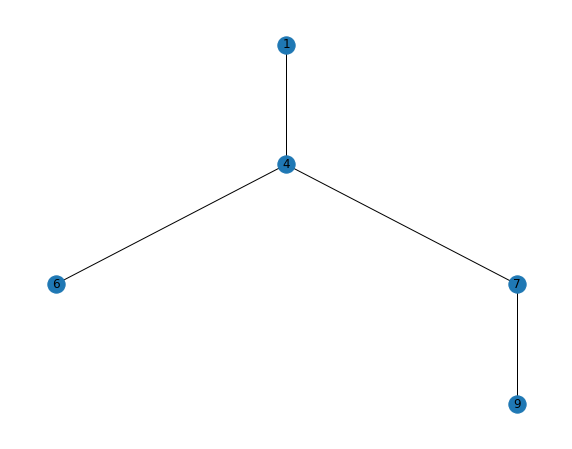

In [302]:
root4 = Node(7)
root4.left = Node(4) 
root4.right = Node(9) 
root4.left.left = Node(1)
root4.left.right = Node(6)

g = build_graph(root4)

fig, ax = plt.subplots(figsize=(10,8))
pos = graphviz_layout(g, prog="dot")
nx.draw(g, with_labels=True, ax=ax, pos=pos)

In [305]:
is_BST(root4, a, b)

True

## Ejercicio 2

Determina si para cualquier lista de enteros distintos existe algún BST tal que su pre-order traversal coincida con la lista inicial. En caso afirmativo da una demostración, en caso negativo muestra un contraejemplo.

Si consideramos una lista cualquiera, cuya unica restricción es que sea no vacía, y sea de enteros posiivos, la afirmación resulta falsa. Pues recordemos que el Pre-Order transversal es un recorrido por la izquierda del árbol binario, así que solo basta poner un número mayor o menor de forma que el arbol no se pueda formar y que por lo tanto su recorrido no se genere.

Para construir un contraejemplo, vamos a crear un arbol binario de busqueda:

In [290]:
'''
          5
        /   \
       3      6
      / \
     2   4
    /
   1
'''
tree = Node(5)
tree.left = Node(3) 
tree.right = Node(6) 
tree.left.left = Node(2)
tree.left.right = Node(4)
tree.left.left.left = Node(1)

In [291]:
# Verifiquemos que se trate de un arbol binario
isBST(tree, mini, maxi)

True

In [292]:
# Obtengamos el Pre Order
pre_order(tree)

5
3
2
1
4
6


Por lo que solo resta, cambiar a nuesra lista de lugar los dos ultimos valores, tal que $X = [5, 3, 2, 1, 6, 4]$. Y con esta nueva lista no es posible generar un arbol binario de busqueda cuyo pre-order sea igual al de la lista.